In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


In [3]:
import os

data_path = os.path.sep.join(['c:', 'kurssit', 'Syvaoppiminen', 'PetImages'])
train_path = os.path.sep.join([data_path, 'train'])
validation_path = os.path.sep.join([data_path, 'validation'])
test_path = os.path.sep.join([data_path, 'test'])

In [56]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    train_path , image_size=(180, 180), batch_size=32)
validation_dataset = image_dataset_from_directory(
    validation_path, image_size=(180, 180), batch_size=32, shuffle=False)
test_dataset = image_dataset_from_directory(
    test_path, image_size=(180, 180), batch_size=32, shuffle=False)





Found 1998 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [57]:
file_paths = test_dataset.file_paths

try:
    for i, (data_batch, labels_batch) in enumerate(test_dataset):
        pass
except Exception as e:
    print(file_paths[i])
    print(f"Error: {type(e).__name__}, Message: {str(e)}")

In [58]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape: ", data_batch.shape)
    print("labels batch shape: ", labels_batch.shape)
    break

data batch shape:  (32, 180, 180, 3)
labels batch shape:  (32,)


In [59]:
inputs = keras.Input(shape=(180, 180, 3))
hidden = layers.Rescaling(1./255)(inputs)
hidden = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(hidden)
hidden = layers.MaxPooling2D(pool_size=2)(hidden)
hidden = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(hidden)
hidden = layers.MaxPooling2D(pool_size=2)(hidden)
hidden = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(hidden)
hidden = layers.MaxPooling2D(pool_size=2)(hidden)
hidden = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(hidden)
hidden = layers.MaxPooling2D(pool_size=2)(hidden)
hidden = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(hidden)
hidden = layers.MaxPooling2D(pool_size=2)(hidden)
hidden = layers.Flatten()(hidden)
outputs = layers.Dense(1, activation="sigmoid")(hidden)
model = keras.Model(inputs=inputs, outputs=outputs)

In [60]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [61]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics= ["accuracy"])

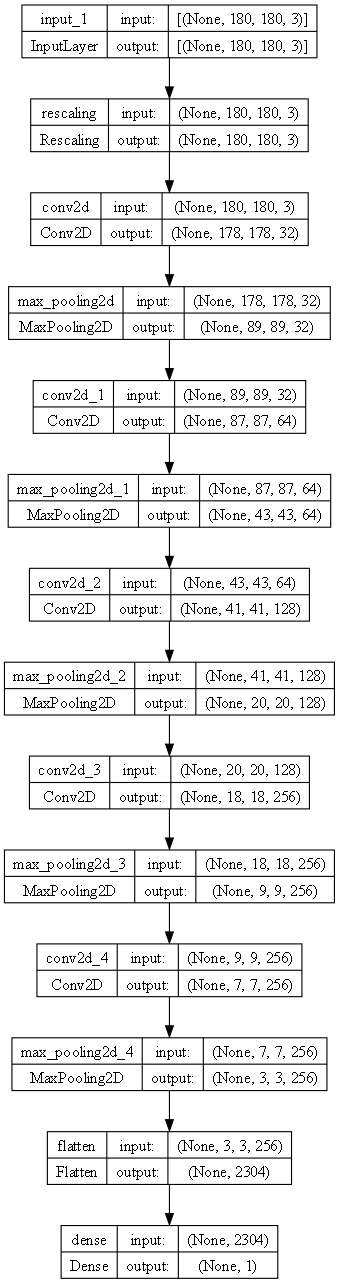

In [62]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, dpi=80)

In [63]:
model.fit(train_dataset, validation_data=validation_dataset, batch_size=32, epochs = 8)

Epoch 1/8
63/63 [==============================] - 56s 863ms/step - loss: 0.6946 - accuracy: 0.5045 - val_loss: 0.6913 - val_accuracy: 0.5230
Epoch 2/8
63/63 [==============================] - 58s 926ms/step - loss: 0.6920 - accuracy: 0.5200 - val_loss: 0.6836 - val_accuracy: 0.6100
Epoch 3/8
63/63 [==============================] - 59s 938ms/step - loss: 0.6659 - accuracy: 0.5811 - val_loss: 0.6785 - val_accuracy: 0.6210
Epoch 4/8
63/63 [==============================] - 61s 961ms/step - loss: 0.6497 - accuracy: 0.6286 - val_loss: 0.6212 - val_accuracy: 0.6560
Epoch 5/8
63/63 [==============================] - 61s 969ms/step - loss: 0.6239 - accuracy: 0.6476 - val_loss: 0.7237 - val_accuracy: 0.5200
Epoch 6/8
63/63 [==============================] - 61s 965ms/step - loss: 0.6103 - accuracy: 0.6642 - val_loss: 0.6327 - val_accuracy: 0.6520
Epoch 7/8
63/63 [==============================] - 60s 958ms/step - loss: 0.5753 - accuracy: 0.6952 - val_loss: 0.5736 - val_accuracy: 0.7000
Epoch 

In [65]:
loss, accuracy = model.evaluate(test_dataset)


63/63 [==============================] - 11s 176ms/step - loss: 0.6791 - accuracy: 0.6745


In [ ]:
print(f"Test accuracy: {label_acc:.3f}")